In [1]:
from Bio import SeqIO
import pandas as pd
import numpy as np
from tqdm import tqdm
import itertools
import pickle
import random

In [2]:
SPEC = "viola.unmasked"

In [3]:
raw_data = {}
with open(f".//{SPEC}.LTR.LTR.fasta", "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        raw_data[record.id] = []
        
with open(f"./{SPEC}.LTR.LTR.fasta", "r") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        raw_data[record.id] += str(record.seq)

data = {}
for k in raw_data.keys():
    data[k] = "".join(raw_data[k])

del raw_data

In [4]:
data.keys()

dict_keys(['ctg000000', 'ctg000010', 'ctg000020', 'ctg000030', 'ctg000040', 'ctg000050', 'ctg000060', 'ctg000070', 'ctg000080', 'ctg000090', 'ctg000100', 'ctg000110', 'ctg000120', 'ctg000130', 'ctg000140', 'ctg000150', 'ctg000170', 'ctg000180', 'ctg000190', 'ctg000200', 'ctg000210', 'ctg000220', 'ctg000230', 'ctg000240', 'ctg000250', 'ctg000260', 'ctg000270', 'ctg000280', 'ctg000290', 'ctg000300', 'ctg000310', 'ctg000320', 'ctg000330', 'ctg000340', 'ctg000350', 'ctg000360', 'ctg000370', 'ctg000380', 'ctg000390', 'ctg000400', 'ctg000410', 'ctg000430', 'ctg000440', 'ctg000450', 'ctg000460', 'ctg000470', 'ctg000480', 'ctg000490', 'ctg000500', 'ctg000510', 'ctg000520', 'ctg000530', 'ctg000540', 'ctg000550', 'ctg000560', 'ctg000570', 'ctg000580', 'ctg000590', 'ctg000600', 'ctg000620', 'ctg000630', 'ctg000640', 'ctg000650', 'ctg000660', 'ctg000670', 'ctg000680', 'ctg000690', 'ctg000700', 'ctg000710', 'ctg000720', 'ctg000730', 'ctg000740', 'ctg000750', 'ctg000760', 'ctg000770', 'ctg000780', '

In [5]:
def count_kmers(read, k):
    """Count kmer occurrences in a given read.

    Parameters
    ----------
    read : string
        A single DNA sequence.
    k : int
        The value of k for which to count kmers.

    Returns
    -------
    counts : dictionary, {'string': int}
        A dictionary of counts keyed by their individual kmers (strings
        of length k).

    Examples
    --------
    >>> count_kmers("GATGAT", 3)
    {'ATG': 1, 'GAT': 2, 'TGA': 1}
    """
    # Start with an empty dictionary
    counts = {}
    nucleotides = ['A', 'T', 'G', 'C']
    # Add the kmer to the dictionary if it's not there
    for i in itertools.product(nucleotides, repeat=k):
        counts["".join(i)] = 0
    # Calculate how many kmers of length k there are
    num_kmers = len(read) - k + 1
    # Loop over the kmer start positions
    for i in range(num_kmers):
        # Slice the string to get the kmer
        kmer = read[i:i+k]
        if kmer not in counts:
            continue
        # Increment the count for this kmer
        counts[kmer] += 1
    # Return the final counts
    return counts

In [6]:
K = 2
kmer_datas = {}

for k, v in tqdm(data.items()):
    kmer_data = count_kmers(v, K)
    kmer_datas[k] = kmer_data

100%|██████████| 181/181 [00:07<00:00, 23.06it/s]


In [7]:
import math
reg_data = {}
unmasked_data_length = {}
with open(f"./{SPEC}.fasta", "r") as f:
    for record in SeqIO.parse(f, "fasta"):
        unmasked_data_length[record.id] = len(record.seq)

for k1, v1 in kmer_datas.items():
    temp = {}
    for k2, v2 in v1.items():
        # temp[k2] = math.log(v2 / unmasked_data_length[k1] + 1)
        temp[k2] = v2 / unmasked_data_length[k1]
    reg_data[k1] = temp

In [8]:
#df = pd.DataFrame(kmer_datas)
df = pd.DataFrame(reg_data)

In [9]:
df.T

,AA,AT,AG,AC,TA,TT,TG,TC,GA,GT,GG,GC,CA,CT,CG,CC
ctg000000,0.000869,0.000617,0.001290,0.000813,0.000925,0.000477,0.001009,0.000673,0.001374,0.001261,0.002327,0.000589,0.000449,0.000701,0.000925,0.000897
ctg000010,0.002755,0.001330,0.000737,0.001538,0.001201,0.000753,0.000913,0.001121,0.001394,0.000849,0.002243,0.000144,0.001025,0.001057,0.000737,0.001682
ctg000020,0.002951,0.002701,0.002155,0.002436,0.002576,0.002998,0.001686,0.002436,0.002514,0.001858,0.001514,0.001468,0.002186,0.002108,0.002061,0.002264
ctg000030,0.000069,0.000069,0.000092,0.000023,0.000046,0.000023,0.000046,0.000023,0.000138,0.000000,0.000161,0.000000,0.000023,0.000046,0.000000,0.000023
ctg000040,0.002653,0.002113,0.001557,0.000985,0.001128,0.002780,0.001398,0.002796,0.002780,0.000874,0.002288,0.000365,0.000763,0.002335,0.001048,0.000826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ctg001810,0.002991,0.002474,0.002088,0.001749,0.002316,0.003037,0.001933,0.002098,0.002094,0.001779,0.001896,0.001327,0.001901,0.002095,0.001179,0.001818
ctg001820,0.003137,0.002694,0.002374,0.002041,0.002564,0.003171,0.002093,0.002384,0.002381,0.001982,0.002199,0.001537,0.002165,0.002366,0.001431,0.002342
ctg001830,0.002884,0.002470,0.002027,0.001715,0.002315,0.003025,0.001860,0.002037,0.002053,0.001722,0.001810,0.001265,0.001845,0.002021,0.001151,0.001822
ctg001840,0.002642,0.002109,0.001401,0.001253,0.001779,0.002636,0.001531,0.001496,0.001458,0.001230,0.001056,0.000873,0.001527,0.001465,0.000630,0.001137


In [10]:
"""import seaborn as sns
import matplotlib.pyplot as plt
sns.clustermap(df.T, col_cluster=False, yticklabels=True, figsize=(50,50))
plt.savefig(f"./{SPEC}_clustermap.png")"""

'import seaborn as sns\nimport matplotlib.pyplot as plt\nsns.clustermap(df.T, col_cluster=False, yticklabels=True, figsize=(50,50))\nplt.savefig(f"./{SPEC}_clustermap.png")'

In [11]:
from scipy.cluster.hierarchy import dendrogram, linkage
import matplotlib.pyplot as plt

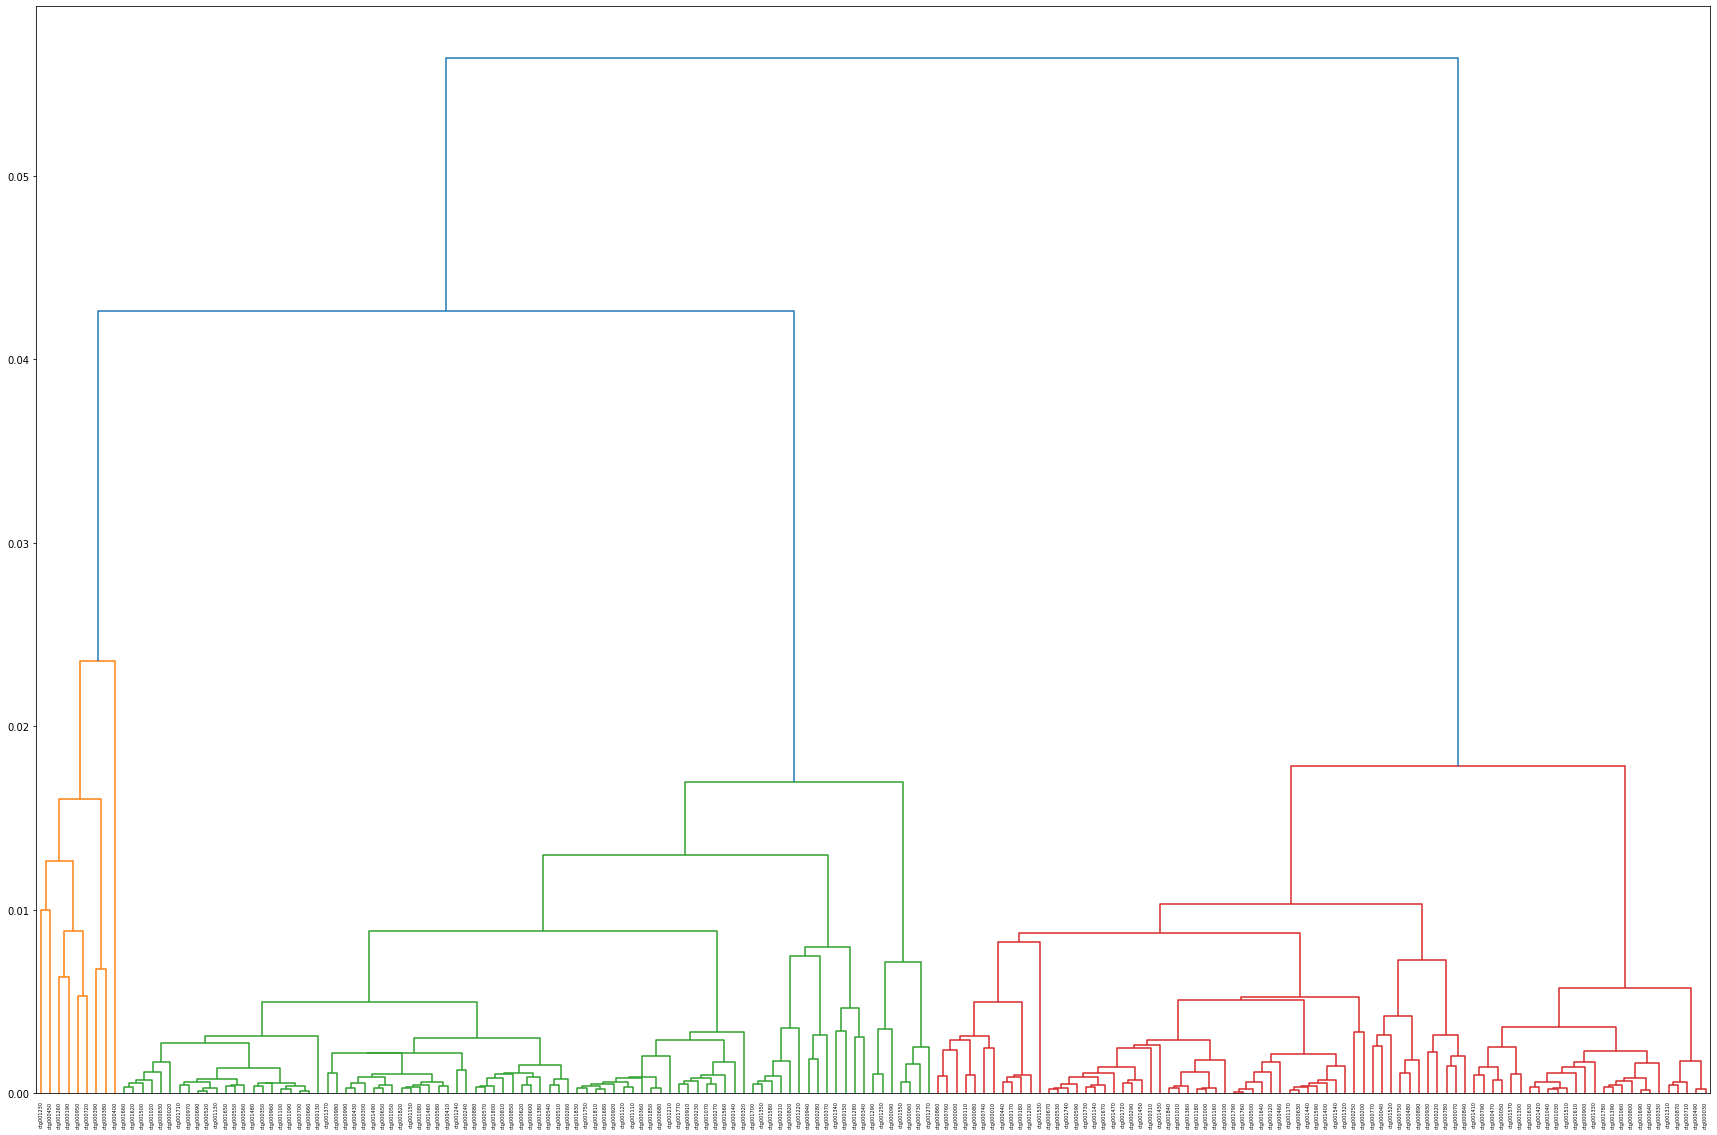

In [12]:
plt.figure(figsize=(30, 20))
linked = linkage(df.T, method="ward")
dend = dendrogram(linked, orientation='top', distance_sort='descending', \
                  labels=list(df.T.index), show_leaf_counts=True)
plt.savefig(f"./{SPEC}_dendrogram.png")

# For Viola

In [19]:
cluster = {"C1":[], "C2": [], "C3":[], "C4":[]}
for l, c in zip(dend["leaves"], dend["leaves_color_list"]):
    cluster[c].append(l)

In [24]:
sub1 = cluster["C1"] + cluster["C2"]
sub2 = cluster["C3"]
def encoder(n):
    if n<10: return f"ctg0000{n}0"
    elif n<100: return f"ctg000{n}0"
    else: return f"ctg00{n}0"
sub1 = list(map(encoder, sub1))
sub2 = list(map(encoder, sub2))

In [25]:
print(sub1)
print(sub2)

['ctg001190', 'ctg000430', 'ctg001220', 'ctg000180', 'ctg000920', 'ctg000690', 'ctg000380', 'ctg000370', 'ctg000390', 'ctg001610', 'ctg001570', 'ctg001460', 'ctg000990', 'ctg000800', 'ctg000020', 'ctg001660', 'ctg000940', 'ctg000660', 'ctg000500', 'ctg001100', 'ctg001600', 'ctg000530', 'ctg000540', 'ctg001440', 'ctg000340', 'ctg000930', 'ctg001070', 'ctg001060', 'ctg000670', 'ctg000630', 'ctg000130', 'ctg001330', 'ctg000950', 'ctg000960', 'ctg000410', 'ctg000290', 'ctg001450', 'ctg000620', 'ctg001020', 'ctg001770', 'ctg001120', 'ctg001050', 'ctg001420', 'ctg000560', 'ctg000400', 'ctg001200', 'ctg000230', 'ctg000850', 'ctg000550', 'ctg001750', 'ctg000780', 'ctg000820', 'ctg000590', 'ctg000580', 'ctg001340', 'ctg000520', 'ctg000490', 'ctg000250', 'ctg001780', 'ctg001700', 'ctg001760', 'ctg001630', 'ctg000890', 'ctg001090', 'ctg001080', 'ctg000350', 'ctg001800', 'ctg000650', 'ctg001170', 'ctg001720', 'ctg000880', 'ctg000220', 'ctg001040', 'ctg000260', 'ctg001520', 'ctg000140', 'ctg000310'

In [16]:
group1 = {}
group2 = {}
with open("./viola.unmasked.fasta", "r") as f:
    for record in SeqIO.parse(f, "fasta"):
        if record.id in sub1:
            group1[record.id] = str(record.seq)
        elif record.id in sub2:
            group2[record.id] = str(record.seq)

with open("./sub1.fasta", "w") as f1:
    for k, v in group1.items():
        f1.write(f">{k}\n")
        f1.write(f"{v}\n")

with open("./sub2.fasta", "w") as f2:
    for k, v in group2.items():
        f2.write(f">{k}\n")
        f2.write(f"{v}\n")

In [17]:
!cat sub1.fasta | grep ">" | wc -l
!cat sub2.fasta | grep ">" | wc -l

95
86


In [ ]:
+